# Лабораторная работа 2
### Выполнил: Баютов Александр Владимирович

Добро пожаловать в лабораторную работу!
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках.
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать

---

признаки, выяснить их значимость и исследовать зависимости между ними.

In [9]:
# exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
my_seed = 12345 # любое целое число на ваш выбор
random.seed(my_seed)
np.random.seed(my_seed)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_features.csv', index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
b29797296e310d2275f2cd67eeacf2eb,2117,22,7,15,1,5,4.0,9,15,0,8997,33,14849,1450,1450,854.938,18,100,116,64.543,0,0,10,0,0.576,0,0,14,15,17,6.0,5,5,3,14074,172,17166,1301,1320,1742.939,20,90,124,20.754,9,2,7,0,0.333,0,0,0,0,59,13.0,14,7,17,16285,175,17455,1928,3120,650.938,20,112,112,0.000,0,0,5,0,0.606,0,1,0,0,26,5.0,2,14,10,12306,52,17593,2030,2030,1368.939,20,100,112,152.313,3,1,13,0,0.576,0,0,0,0,12,2.0,8,10,10,12178,134,15145,1520,1520,914.938,18,104,110,0.000,0,0,7,0,0.364,1,0,0,3,2,14,9,11,0,14789,111,22155,2335,2335,1149.939,23,104,140,0.000,0,0,7,0,0.676,0,0,0,0,57,4,5,14,3,12847,56,19456,2355,2355,1291.939,21,126,130,0.000,0,0,7,1,0.486,0,1,6,8,84,8,7,8,7,13033,52,18275,1980,1980,1424.939,20,

Сначала идут признаки матча: game_time 	game_mode 	lobby_type 	objectives_len 	chat_len.

Затем признаки для каждого игрока (r1-r5, d1-d5): r1_hero_id 	r1_kills 	r1_deaths 	r1_assists и т.д.

Text(0.5, 1.0, 'Подсчёт игр в различных лобби')

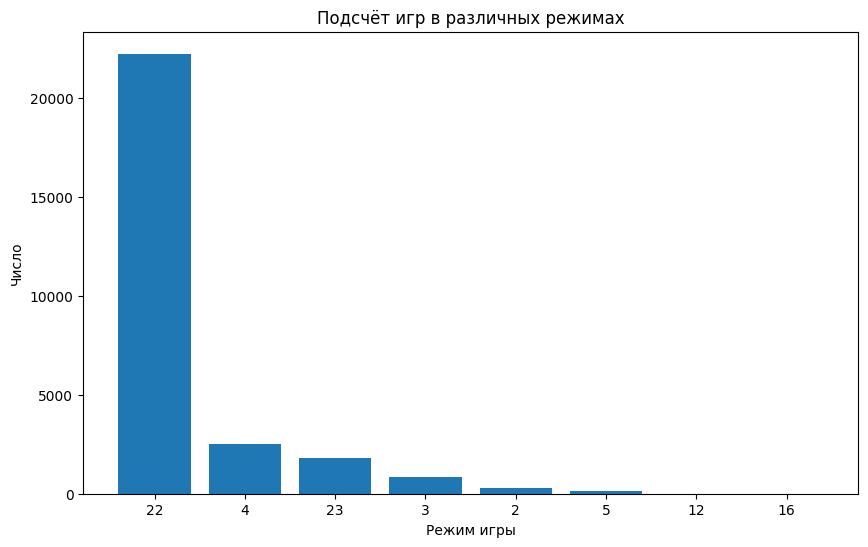

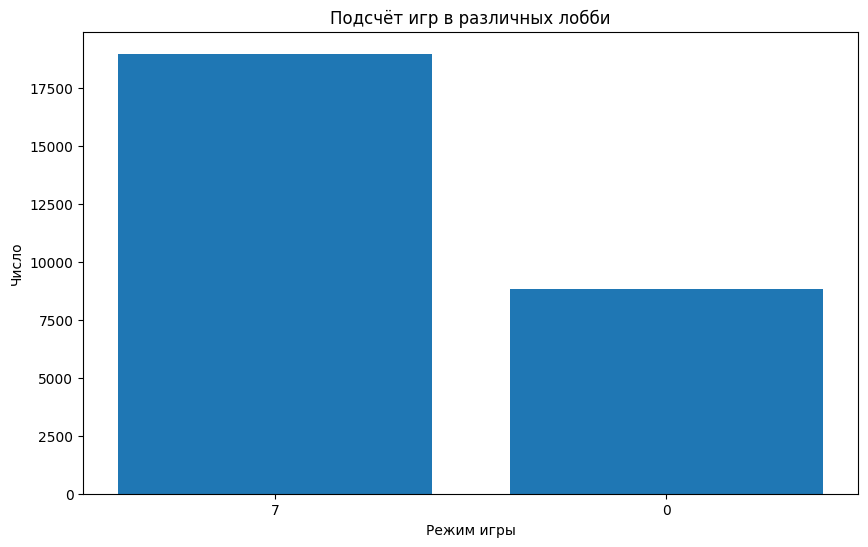

In [36]:
modes = data['game_mode'].value_counts().reset_index().rename(columns={'game_mode2': 'count', 'index': 'game_mode1'})
plt.figure(figsize=(10, 6))
plt.bar(range(len(modes['game_mode'])), modes['count']);
plt.xticks(range(len(modes['game_mode'])), modes['game_mode']);
plt.xlabel('Режим игры');
plt.ylabel('Число');
plt.title('Подсчёт игр в различных режимах')
lobbys = data['lobby_type'].value_counts().reset_index().rename(columns={'lobby_type2': 'count', 'index': 'lobby_type1'})
plt.figure(figsize=(10, 6))
plt.bar(range(len(lobbys['lobby_type'])), lobbys['count']);
plt.xticks(range(len(lobbys['lobby_type'])), lobbys['lobby_type']);
plt.xlabel('Лобби');
plt.ylabel('Число');
plt.title('Подсчёт игр в различных лобби')

Ничего необычного

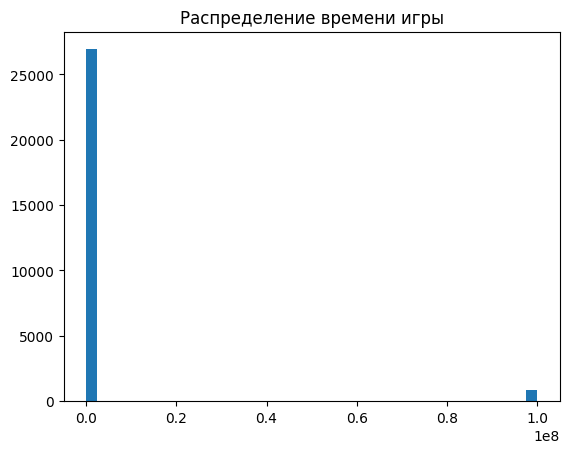

In [37]:
plt.hist(data['game_time'], bins=40, label='Train');
plt.title('Распределение времени игры');

Видны выбросы около 10^8

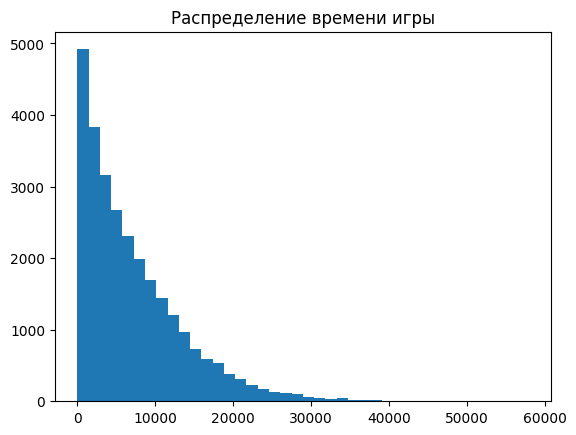

In [40]:
plt.hist(data['r1_gold'], bins=40);
plt.title('Распределение золота 1 игрока');

In [41]:
data.isna().sum()

,0
game_time,0
game_mode,0
lobby_type,0
objectives_len,0
chat_len,0
r1_hero_id,0
r1_kills,2777
r1_deaths,0
r1_assists,0
r1_denies,0


NaN'ы есть только среди r1-r4_kills

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

In [10]:
# preprocessing pipeline
for column in data:
    median = data[column].median(skipna=True)
    q95 = data[column].quantile(0.95)
    q05 = data[column].quantile(0.05)
    data.loc[(data[column] > int(q95)) | (data[column] < int(q05)), column] = median

dire_deaths = data[['d1_deaths', 'd2_deaths', 'd3_deaths', 'd4_deaths', 'd5_deaths']].sum().sum()
radiant_kills = data[['r1_kills', 'r2_kills', 'r3_kills', 'r4_kills', 'r5_kills']].sum().sum()
kills_diff = dire_deaths - radiant_kills
nan_kills_cols = data.filter(regex='^r\d_kills').columns[data.filter(regex='^r\d_kills').isnull().any()]
num_nan_kills = len(nan_kills_cols)

if num_nan_kills > 0:
    kills_to_add = kills_diff / num_nan_kills
    for col in nan_kills_cols:
        data[col] = data[col].fillna(round(kills_to_add))

data.describe()

<ipython-input-10-c53dab7cd0e6>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5969.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] > int(q95)) | (data[column] < int(q05)), column] = median
<ipython-input-10-c53dab7cd0e6>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5988.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] > int(q95)) | (data[column] < int(q05)), column] = median
<ipython-input-10-c53dab7cd0e6>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5959.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[column] > int(q95)) | (data[column] < int(q05)), column] = median
<ipytho

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.0,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.0,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.000000,27772.

Заменяем выбросы на медианы. NaN'ы в kill'ах заполняем с помощью данных о смертях в команде противника



---

### Обработка json для эксперимента 2



In [ ]:
# some code and comments
import json

def extract_features_from_json(json_string):
    json_data = json.loads(json_string)
    match_id = json_data.get('match_id', None)
    game_time = json_data.get('game_time', None)
    game_mode = json_data.get('game_mode', None)
    lobby_type = json_data.get('lobby_type', None)

    first_blood_time = game_time
    first_blood_player_slot = -1
    if 'objectives' in json_data and len(json_data['objectives']) > 0:
        for obj in json_data['objectives']:
            if obj.get('type') == 'CHAT_MESSAGE_FIRSTBLOOD':
                first_blood_time = obj.get('time', game_time)
                first_blood_player_slot = obj.get('player_slot', -1)
                break

    chat_len = len(json_data.get('chat', []))
    chat_first_message_time = game_time
    if chat_len > 0:
        chat_first_message_time = json_data['chat'][0].get('time', game_time)

    players_features = []
    radiant_gold = 0
    dire_gold = 0
    radiant_xp = 0
    dire_xp = 0
    radiant_kills = 0
    dire_kills = 0
    for player in json_data.get('players', []):
        player_features = {
            'player_slot': player.get('player_slot', None),
            'hero_id': player.get('hero_id', None),
            'kills': player.get('kills', 0),
            'deaths': player.get('deaths', 0),
            'assists': player.get('assists', 0),
            'denies': player.get('denies', 0),
            'gold': player.get('gold', 0),
            'lh': player.get('lh', 0),
            'xp': player.get('xp', 0),
            'health': player.get('health', 0),
            'max_health': player.get('max_health', 0),
            'max_mana': player.get('max_mana', 0),
            'level': player.get('level', 0),
            'x': player.get('x', 0),
            'y': player.get('y', 0),
            'stuns': player.get('stuns', 0),
            'creeps_stacked': player.get('creeps_stacked', 0),
            'camps_stacked': player.get('camps_stacked', 0),
            'rune_pickups': player.get('rune_pickups', 0),
            'firstblood_claimed': player.get('firstblood_claimed', 0),
            'teamfight_participation': player.get('teamfight_participation', 0),
            'towers_killed': player.get('towers_killed', 0),
            'roshans_killed': player.get('roshans_killed', 0),
            'obs_placed': player.get('obs_placed', 0),
            'sen_placed': player.get('sen_placed', 0),
            'damage_taken': sum(player.get('damage_taken', {}).values()),
            'damage_dealt': sum(player.get('damage', {}).values()),
            'healing': sum(player.get('healing', {}).values()),
            'items_purchased': len(player.get('purchase_log', [])),
            'actions': sum(player.get('actions', {}).values())
        }
        kills = player.get('kills', 0)
        deaths = player.get('deaths', 0)
        assists = player.get('assists', 0)
        player_features['kda'] = (kills + assists) / (deaths + 1)
        if player.get('is_radiant'):
            radiant_gold += player.get('gold', 0)
            radiant_xp += player.get('xp', 0)
            radiant_kills += kills
        else:
            dire_gold += player.get('gold', 0)
            dire_xp += player.get('xp', 0)
            dire_kills += kills
        player_features['ability_upgrades_count'] = len(player.get('ability_upgrades', []))

        max_hero_hit = player.get("max_hero_hit")
        if max_hero_hit:
            player_features['max_hero_hit_value'] = max_hero_hit.get('value', 0)

        player_features['items_count'] = sum(player.get('purchase', {}).values())

        player_features['gold_reasons_total'] = sum(player.get('gold_reasons', {}).values())
        player_features['xp_reasons_total'] = sum(player.get('xp_reasons', {}).values())
        player_features['actions_total'] = sum(player.get('actions', {}).values())
        player_features['pings_count'] = sum(player.get('pings', {}).values())
        player_features['item_uses_total'] = sum(player.get('item_uses', {}).values())
        player_features['ability_uses_total'] = sum(player.get('ability_uses', {}).values())
        player_features['damage_inflictor_total'] = sum(player.get('damage_inflictor', {}).values())
        player_features['damage_taken_total'] = sum(player.get('damage_taken', {}).values())
        player_features['life_state_total'] = sum(player.get('life_state', {}).values())


        kills = player.get('kills', 0)
        deaths = player.get('deaths', 0)
        assists = player.get('assists', 0)
        player_features['kda_no_assists'] = kills / (deaths + 1) if deaths else kills
        player_features['gold_per_item'] = player.get('gold', 0) / (player_features['items_count'] + 1) if player_features['items_count'] else 0
        players_features.append(player_features)

    match_features = {
        'match_id': match_id,
        'game_time': game_time,
        'game_mode': game_mode,
        'lobby_type': lobby_type,
        'first_blood_time': first_blood_time,
        'first_blood_player_slot': first_blood_player_slot,
        'chat_len': chat_len,
        'chat_first_message_time': chat_first_message_time,
        'gold_diff': radiant_gold - dire_gold,
        'xp_diff': radiant_xp - dire_xp,
        'kills_diff': radiant_kills - dire_kills
    }

    for i, player in enumerate(players_features):
        for key, value in player.items():
            match_features[f'player_{i+1}_{key}'] = value

    return match_features


json_file_path = '/content/drive/MyDrive/Colab Notebooks/tome_of_knowledge.jsonl'

all_features = []

with open(json_file_path, 'r') as file:
    for line in file:
        try:
            new_features = extract_features_from_json(line)
            all_features.append(new_features)
        except json.JSONDecodeError as e:
            print(f"Ошибка декодирования JSON в строке: {line.strip()[:50]}...\nОшибка: {e}")


all_features_df = pd.DataFrame(all_features)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_features.csv')
data = data['match_id']
data = pd.merge(data, all_features_df, on='match_id', how='left')

Тут я вытащил из json почти всю информацию, которую можно представить в виде чисел. Так же добавил свои признаки.

In [69]:
data.describe()

,game_time,game_mode,lobby_type,first_blood_time,first_blood_player_slot,chat_len,chat_first_message_time,gold_diff,xp_diff,kills_diff,player_1_player_slot,player_1_hero_id,player_1_kills,player_1_deaths,player_1_assists,player_1_denies,player_1_gold,player_1_lh,player_1_xp,player_1_health,player_1_max_health,player_1_max_mana,player_1_level,player_1_x,player_1_y,player_1_stuns,player_1_creeps_stacked,player_1_camps_stacked,player_1_rune_pickups,player_1_firstblood_claimed,player_1_teamfight_participation,player_1_towers_killed,player_1_roshans_killed,player_1_obs_placed,player_1_sen_placed,player_1_damage_taken,player_1_damage_dealt,player_1_healing,player_1_items_purchased,player_1_actions,player_1_kda,player_1_ability_upgrades_count,player_1_max_hero_hit_value,player_1_items_count,player_1_gold_reasons_total,player_1_xp_reasons_total,player_1_actions_total,player_1_pings_count,player_1_item_uses_total,player_1_ability_uses_total,player_1_damage_inflictor_total,player_1_damage_taken_total,player_1_life_state_total,player_1_kda_no_assists,player_1_gold_per_item,player_2_player_slot,player_2_hero_id,player_2_kills,player_2_deaths,player_2_assists,player_2_denies,player_2_gold,player_2_lh,player_2_xp,player_2_health,player_2_max_health,player_2_max_mana,player_2_level,player_2_x,player_2_y,player_2_stuns,player_2_creeps_stacked,player_2_camps_stacked,player_2_rune_pickups,player_2_firstblood_claimed,player_2_teamfight_participation,player_2_towers_killed,player_2_roshans_killed,player_2_obs_placed,player_2_sen_placed,player_2_damage_taken,player_2_damage_dealt,player_2_healing,player_2_items_purchased,player_2_actions,player_2_kda,player_2_ability_upgrades_count,player_2_max_hero_hit_value,player_2_items_count,player_2_gold_reasons_total,player_2_xp_reasons_total,player_2_actions_total,player_2_pings_count,player_2_item_uses_total,player_2_ability_uses_total,player_2_damage_inflictor_total,player_2_damage_taken_total,player_2_life_state_total,player_2_kda_no_assists,player_2_gold_per_item,player_3_player_slot,player_3_hero_id,player_3_kills,player_3_deaths,player_3_assists,player_3_denies,player_3_gold,player_3_lh,player_3_xp,player_3_health,player_3_max_health,player_3_max_mana,player_3_level,player_3_x,player_3_y,player_3_stuns,player_3_creeps_stacked,player_3_camps_stacked,player_3_rune_pickups,player_3_firstblood_claimed,player_3_teamfight_participation,player_3_towers_killed,player_3_roshans_killed,player_3_obs_placed,player_3_sen_placed,player_3_damage_taken,player_3_damage_dealt,player_3_healing,player_3_items_purchased,player_3_actions,player_3_kda,player_3_ability_upgrades_count,player_3_max_hero_hit_value,player_3_items_count,player_3_gold_reasons_total,player_3_xp_reasons_total,player_3_actions_total,player_3_pings_count,player_3_item_uses_total,player_3_ability_uses_total,player_3_damage_inflictor_total,player_3_damage_taken_total,player_3_life_state_total,player_3_kda_no_assists,player_3_gold_per_item,player_4_player_slot,player_4_hero_id,player_4_kills,player_4_deaths,player_4_assists,player_4_denies,player_4_gold,player_4_lh,player_4_xp,player_4_health,player_4_max_health,player_4_max_mana,player_4_level,player_4_x,player_4_y,player_4_stuns,player_4_creeps_stacked,player_4_camps_stacked,player_4_rune_pickups,player_4_firstblood_claimed,player_4_teamfight_participation,player_4_towers_killed,player_4_roshans_killed,player_4_obs_placed,player_4_sen_placed,player_4_damage_taken,player_4_damage_dealt,player_4_healing,player_4_items_purchased,player_4_actions,player_4_kda,player_4_ability_upgrades_count,player_4_max_hero_hit_value,player_4_items_count,player_4_gold_reasons_total,player_4_xp_reasons_total,player_4_actions_total,player_4_pings_count,player_4_item_uses_total,player_4_ability_uses_total,player_4_damage_inflictor_total,player_4_damage_taken_total,player_4_life_state_total,player_4_kda_no_assists,player_4_gold_per_item,player_5_player_slot,player_5_hero_id,player_5_kills,player_5_deaths,player_5_assists,pla

json не содержит выбросов и NaN'ов, так что данные уже готовы к

---

### Обработка json для эксперимента 3 и 4


In [5]:
import json

def extract_team_features_from_json(json_string):
    json_data = json.loads(json_string)
    match_id = json_data.get('match_id', None)
    game_time = json_data.get('game_time', None)
    game_mode = json_data.get('game_mode', None)
    lobby_type = json_data.get('lobby_type', None)

    first_blood_time = game_time
    first_blood_player_slot = -1
    if 'objectives' in json_data and len(json_data['objectives']) > 0:
        for obj in json_data['objectives']:
            if obj.get('type') == 'CHAT_MESSAGE_FIRSTBLOOD':
                first_blood_time = obj.get('time', game_time)
                first_blood_player_slot = obj.get('player_slot', -1)
                break

    chat_len = len(json_data.get('chat', []))
    chat_first_message_time = game_time
    if chat_len > 0:
        chat_first_message_time = json_data['chat'][0].get('time', game_time)

    team_features = {'radiant': {}, 'dire': {}}
    for team in team_features:
        team_features[team]['gold'] = 0
        team_features[team]['xp'] = 0
        team_features[team]['kills'] = 0

        for feature in [
            'deaths', 'assists', 'denies', 'lh', 'health', 'max_health', 'max_mana',
            'level', 'stuns', 'creeps_stacked', 'camps_stacked', 'rune_pickups',
            'firstblood_claimed', 'teamfight_participation', 'towers_killed',
            'roshans_killed', 'obs_placed', 'sen_placed', 'actions',
            'ability_upgrades_count', 'max_hero_hit_value', 'items_count',
            'gold_reasons_total', 'xp_reasons_total', 'actions_total',
            'pings_count', 'item_uses_total', 'ability_uses_total',
            'damage_inflictor_total', 'damage_taken_total', 'life_state_total',
            'kda_no_assists', 'gold_per_item', 'damage'
        ]:
             team_features[team][feature] = 0


    players = json_data.get('players', [])
    for i, player in enumerate(players):
        team = 'radiant' if i < 5 else 'dire'
        team_features[team]['gold'] += player.get('gold', 0)
        team_features[team]['xp'] += player.get('xp', 0)
        team_features[team]['kills'] += player.get('kills', 0)

        for feature in [
            'deaths', 'assists', 'denies', 'lh', 'health', 'max_health', 'max_mana',
            'level', 'stuns', 'creeps_stacked', 'camps_stacked', 'rune_pickups',
            'firstblood_claimed', 'teamfight_participation', 'towers_killed',
            'roshans_killed', 'obs_placed', 'sen_placed', 'actions',
            'kda', 'damage'
        ]:
            player_feature = player.get(feature)
            if isinstance(player_feature, dict):
                team_features[team][feature] += sum(player_feature.values(), 0)
            elif isinstance(player_feature, (int, float)):
                team_features[team][feature] += player_feature
            elif isinstance(player_feature, bool):
                if player_feature:
                    team_features[team][feature] += 1


        team_features[team]['ability_upgrades_count'] += len(player.get('ability_upgrades', []))

        max_hero_hit = player.get("max_hero_hit")
        if max_hero_hit:
            team_features[team]['max_hero_hit_value'] += max_hero_hit.get('value', 0)

        team_features[team]['items_count'] += sum(player.get('purchase', {}).values())
        team_features[team]['gold_reasons_total'] += sum(player.get('gold_reasons', {}).values())
        team_features[team]['xp_reasons_total'] += sum(player.get('xp_reasons', {}).values())
        team_features[team]['actions_total'] += sum(player.get('actions', {}).values())
        team_features[team]['pings_count'] += sum(player.get('pings', {}).values())
        team_features[team]['item_uses_total'] += sum(player.get('item_uses', {}).values())
        team_features[team]['ability_uses_total'] += sum(player.get('ability_uses', {}).values())
        team_features[team]['damage_inflictor_total'] += sum(player.get('damage_inflictor', {}).values())
        team_features[team]['damage_taken_total'] += sum(player.get('damage_taken', {}).values())
        team_features[team]['life_state_total'] += sum(player.get('life_state', {}).values())

        kills = player.get('kills', 0)
        deaths = player.get('deaths', 0)
        team_features[team]['kda_no_assists'] += kills / (deaths + 1) if deaths else kills
        team_features[team]['gold_per_item'] += player.get('gold', 0) / (sum(player.get('purchase', {}).values()) + 1) if sum(player.get('purchase', {}).values()) else 0

    match_features = {
        'match_id': match_id,
        'game_time': game_time,
        'game_mode': game_mode,
        'lobby_type': lobby_type,
        'first_blood_time': first_blood_time,
        'first_blood_player_slot': first_blood_player_slot,
        'chat_len': chat_len,
        'chat_first_message_time': chat_first_message_time,
        'gold_diff': team_features['radiant']['gold'] - team_features['dire']['gold'],
        'xp_diff': team_features['radiant']['xp'] - team_features['dire']['xp'],
        'kills_diff': team_features['radiant']['kills'] - team_features['dire']['kills']
    }
    for feature in [
        'gold', 'xp', 'kills', 'deaths', 'assists', 'denies', 'lh', 'health',
        'max_health', 'max_mana', 'level', 'stuns', 'creeps_stacked',
        'camps_stacked', 'rune_pickups', 'firstblood_claimed',
        'teamfight_participation', 'towers_killed', 'roshans_killed',
        'obs_placed', 'sen_placed', 'actions', 'ability_upgrades_count',
        'max_hero_hit_value', 'items_count', 'gold_reasons_total',
        'xp_reasons_total', 'actions_total', 'pings_count', 'item_uses_total',
        'ability_uses_total', 'damage_inflictor_total', 'damage_taken_total',
        'life_state_total', 'kda_no_assists', 'gold_per_item', 'damage'
    ]:
        match_features[f'{feature}_diff'] = team_features['radiant'][feature] - team_features['dire'][feature]

    return match_features


json_file_path = '/content/drive/MyDrive/Colab Notebooks/tome_of_knowledge.jsonl'

all_features = []

with open(json_file_path, 'r') as file:
    for line in file:
        try:
            new_features = extract_team_features_from_json(line)
            all_features.append(new_features)
        except json.JSONDecodeError as e:
            print(f"Ошибка декодирования JSON в строке: {line.strip()[:50]}...\nОшибка: {e}")

all_features_df = pd.DataFrame(all_features)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_features.csv')
data = data['match_id']
data = pd.merge(data, all_features_df, on='match_id', how='left')

### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

#### Эксперимент 1

In [11]:
# some code and comments
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

X = data
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_targets.csv', index_col=0)['radiant_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)


models = {
    'LogisticRegression': (LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
}

best_model = None
best_score = 0

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Модель: {model_name}")
    print("Лучшие параметры", grid_search.best_params_)
    y_pred = grid_search.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:", roc_auc)
    print(classification_report(y_test, grid_search.predict(X_test)))
    print("-" * 50)

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = grid_search.best_estimator_

print(f"Лучшая модель {best_model.named_steps['model'].__class__.__name__} с ROC AUC: {best_score}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Модель: LogisticRegression
Лучшие параметры {'model__C': 0.001}
ROC AUC: 0.7807955101528228
              precision    recall  f1-score   support

       False       0.71      0.64      0.67      3975
        True       0.70      0.76      0.73      4357

    accuracy                           0.70      8332
   macro avg       0.70      0.70      0.70      8332
weighted avg       0.70      0.70      0.70      8332

--------------------------------------------------
Лучшая модель LogisticRegression с ROC AUC: 0.7807955101528228


Логистическая регрессия с перебором силы регуляризации. Такая простая модель преодолела baseline на kaggle

#### Эксперимент 2

Далее я решил воспользоваться json файлом

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
data = data.drop('match_id', axis=1)
X = data
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_targets.csv', index_col=0)['radiant_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)


models = {
    'LogisticRegression': (LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
}

best_model = None
best_score = 0

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Модель: {model_name}")
    print("Лучшие параметры", grid_search.best_params_)
    y_pred = grid_search.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:", roc_auc)
    print(classification_report(y_test, grid_search.predict(X_test)))
    print("-" * 50)

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = grid_search.best_estimator_

print(f"Лучшая модель {best_model.named_steps['model'].__class__.__name__} с ROC AUC: {best_score}")

coefficients = best_model['model'].coef_[0]
column_names = X.columns

coefficients_with_names = pd.DataFrame({
    'Column Name': column_names,
    'Coefficient': coefficients
})

coefficients_with_names_sorted = coefficients_with_names.sort_values(by='Coefficient', ascending=False)

print(coefficients_with_names_sorted)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Модель: LogisticRegression
Лучшие параметры {'model__C': 0.1}
ROC AUC: 0.8141829168128205
              precision    recall  f1-score   support

       False       0.74      0.67      0.70      3975
        True       0.72      0.78      0.75      4357

    accuracy                           0.73      8332
   macro avg       0.73      0.73      0.73      8332
weighted avg       0.73      0.73      0.73      8332

--------------------------------------------------
Лучшая модель LogisticRegression с ROC AUC: 0.8141829168128205
                           Column Name  Coefficient
157                     player_4_level     0.494102
112                     player_3_level     0.469045
67                      player_2_level     0.466167
266    player_6_ability_upgrades_count     0.454364
22                      player_1_level     0.418015
178               player_4_items_count     0.369515
202                     player_5_level     0.

Модель осталось той же. Но из-за большего количества признаков получился гараздо лучший результат

#### Эксперимент 3

Смотря на коэффициенты полученные на прошлом шаге, я заметил, что для разных игроков они разные, чего быть не должно, т.к. игроки распределяются случайно. Поэтому я решил объединить игроков в команды, а затем найти разницу между командами, чтобы разные команды не имели разных коэффициентов для одинаковых признаков

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
data = data.drop('match_id', axis=1)
X = data
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_targets.csv', index_col=0)['radiant_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)


models = {
    'LogisticRegression': (LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}),
}

best_model = None
best_score = 0

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Модель: {model_name}")
    print("Лучшие параметры", grid_search.best_params_)
    y_pred = grid_search.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:", roc_auc)
    print(classification_report(y_test, grid_search.predict(X_test)))
    print("-" * 50)

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = grid_search.best_estimator_

print(f"Лучшая модель {best_model.named_steps['model'].__class__.__name__} с ROC AUC: {best_score}")

coefficients = best_model['model'].coef_[0]
column_names = X.columns

coefficients_with_names = pd.DataFrame({
    'Column Name': column_names,
    'Coefficient': coefficients
})

coefficients_with_names_sorted = coefficients_with_names.sort_values(by='Coefficient', ascending=False)

print(coefficients_with_names_sorted)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Модель: LogisticRegression
Лучшие параметры {'model__C': 0.1}
ROC AUC: 0.8189495108716836
              precision    recall  f1-score   support

       False       0.74      0.67      0.71      3975
        True       0.72      0.78      0.75      4357

    accuracy                           0.73      8332
   macro avg       0.73      0.73      0.73      8332
weighted avg       0.73      0.73      0.73      8332

--------------------------------------------------
Лучшая модель LogisticRegression с ROC AUC: 0.8189495108716836
                     Column Name  Coefficient
17                    level_diff     0.697646
7                      gold_diff     0.411708
32       gold_reasons_total_diff     0.352580
31              items_count_diff     0.350771
41           kda_no_assists_diff     0.286668
24            towers_killed_diff     0.249338
42            gold_per_item_diff     0.246868
38   damage_inflictor_total_diff     0.18

Итак, я избавился от большого количества признаков, но результат только улучшился, т.к. тем самым я "подсказал" модели, что различные игроки одинаково важны.

Однако, результат не идеален: отрицательных коэфициентов хоть и не много, но они есть. И не понятно, как может большее кол-во урона/убийств/способностей увеличить шанс поражения.

#### Эксперимент 4

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

data = data.drop('match_id', axis=1)
X = data
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DOTA2_TRAIN_targets.csv', index_col=0)['radiant_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

models = {
    'LogisticRegression': (LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10]}),
    'RandomForestClassifier': (RandomForestClassifier(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}),
    'HistGradientBoostingClassifier': (HistGradientBoostingClassifier(), {'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_iter': [100, 200]}),
    'XGBClassifier': (XGBClassifier(), {'model__learning_rate': [0.01, 0.1, 0.2], 'model__n_estimators': [50, 100, 200]}),
    'LGBMClassifier': (LGBMClassifier(), {'model__learning_rate': [0.01, 0.1, 0.2], 'model__n_estimators': [50, 100, 200]})
}

best_estimators = []

for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Модель: {model_name}")
    print("Лучшие параметры:", grid_search.best_params_)
    y_pred = grid_search.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC:", roc_auc)
    print(classification_report(y_test, grid_search.predict(X_test)))
    print("-" * 50)

    best_estimators.append((model_name, grid_search.best_estimator_))


voting_classifier = VotingClassifier(estimators=best_estimators, voting='soft')
voting_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 7 folds for each of 5 candidates, totalling 35 fits
Модель: LogisticRegression
Лучшие параметры: {'model__C': 0.1}
ROC AUC: 0.8189495108716836
              precision    recall  f1-score   support

       False       0.74      0.67      0.71      3975
        True       0.72      0.78      0.75      4357

    accuracy                           0.73      8332
   macro avg       0.73      0.73      0.73      8332
weighted avg       0.73      0.73      0.73      8332

--------------------------------------------------
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Модель: RandomForestClassifier
Лучшие параметры: {'model__max_depth': 10, 'model__n_estimators': 200}
ROC AUC: 0.8189424088757626
              precision    recall  f1-score   support

       False       0.74      0.68      0.71      3975
        True       0.73      0.78      0.75      4357

    accuracy                           0.73      8332
   macro avg       0.73      0.73      0.73      8332
weighted 

VotingClassifier(estimators=[('LogisticRegression',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression(C=0.1))])),
                             ('RandomForestClassifier',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=200))])),
                             ('HistGradientBoostingClassifier',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              (...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=50,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))])),
                             ('LGBMClassifier',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LGBMClassifier(n_estimators=50))]))],
                 voting='soft')

Т.к. осталось мало признаков, модели обучаются быстро. Поэтому я решил использовать сразу несколько, подобрав гиперпараметры и усреднив результат.

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели.

In [7]:
y_pred_voting = voting_classifier.predict_proba(X_test)[:, 1]
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

print("ROC AUC:", roc_auc_voting)
print(classification_report(y_test, voting_classifier.predict(X_test)))

ROC AUC: 0.8228681381655775
              precision    recall  f1-score   support

       False       0.74      0.68      0.71      3975
        True       0.73      0.78      0.75      4357

    accuracy                           0.73      8332
   macro avg       0.74      0.73      0.73      8332
weighted avg       0.73      0.73      0.73      8332



### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы.
Что получилось / не получилось и почему?

Получилось значительно сократить кол-во признаков, улучшив результат. Не получилось как-то использовать id героя, что могло вносить значительный вклад в вероятность победы. Некоторые другие категориальные признаки из json тоже не получилось использовать, т.к. слишком много видов и они все идут списком, так что я просто брал их кол-во